In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, boxcox
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


df = pd.read_csv(r"C:\Users\Alen Jose\Downloads\archive (26)\diabetes_012_health_indicators_BRFSS2015.csv")

df.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


**About Dataset:** 
The dataset is collected from Kaggle. The dataset originates from the Behavioral Risk Factor Surveillance System (BRFSS), an annual telephone survey by the CDC since 1984, collecting data on health-related risk behaviors, chronic health conditions, and preventative service usage.

This contains 3 CSV files among them I took "diabetes_012_health_indicators_BRFSS2015.csv". It Contains 253,680 responses with 21 features. The target variable, Diabetes_012, has 3 classes: 0 (no diabetes or only during pregnancy), 1 (prediabetes), and 2 (diabetes). 

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.isnull().sum()
print("\nMissing Values in Each Column:\n", df.isnull().sum())
df = df.drop_duplicates()
print(f"Dataset shape after duplicate removal: {df.shape}")


Missing Values in Each Column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Dataset shape after duplicate removal: (229781, 22)


In [7]:

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
if 'Diabetes_012' in numerical_columns:
    numerical_columns.remove('Diabetes_012')


Binary Features: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Non-Binary Numerical Features: ['GenHlth', 'Age', 'MentHlth', 'Education', 'BMI', 'Income', 'PhysHlth']
 Z-score Summary BEFORE Outlier Handling:
           GenHlth           Age      MentHlth     Education           BMI  \
mean  1.333383e-16 -1.652504e-16  3.358195e-17 -7.922372e-17 -1.935755e-16   
std   1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   

            Income      PhysHlth  
mean -2.102737e-17  2.532561e-17  
std   1.000002e+00  1.000002e+00  


<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Alen Jose\AppData\Local\Temp\ipykernel_4476\2611388694.py:12: SyntaxWarning: invalid escape sequence '\D'
  print(f"\Dataset shape after removing extreme outliers: {df_cleaned.shape}")


\Dataset shape after removing extreme outliers: (228421, 22)

Z-score Summary AFTER Removing Extreme Outliers:
           GenHlth           Age      MentHlth     Education           BMI  \
mean  1.672297e-16  1.532939e-16 -4.977075e-19 -2.588079e-16 -6.594624e-18   
std   1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   

            Income      PhysHlth  
mean  1.353764e-16 -7.764237e-17  
std   1.000002e+00  1.000002e+00  
 Dataset shape after outlier imputation: (228421, 22)
 Z-score Summary AFTER Imputation:
           GenHlth           Age      MentHlth     Education           BMI  \
mean  1.672297e-16  1.532939e-16  5.213486e-17 -1.624517e-15  6.287290e-16   
std   1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   

            Income      PhysHlth  
mean  1.353764e-16 -7.764237e-17  
std   1.000002e+00  1.000002e+00  


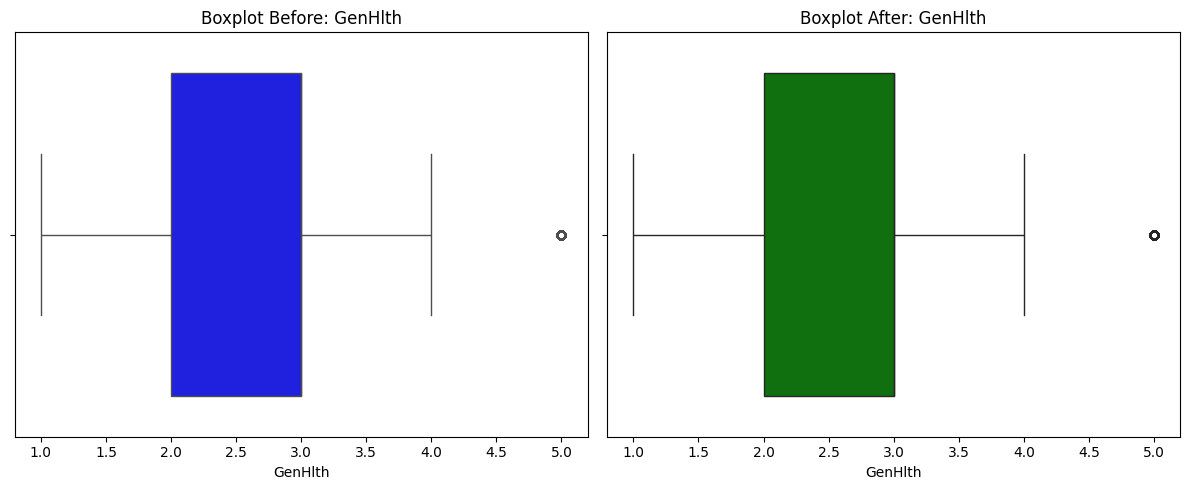

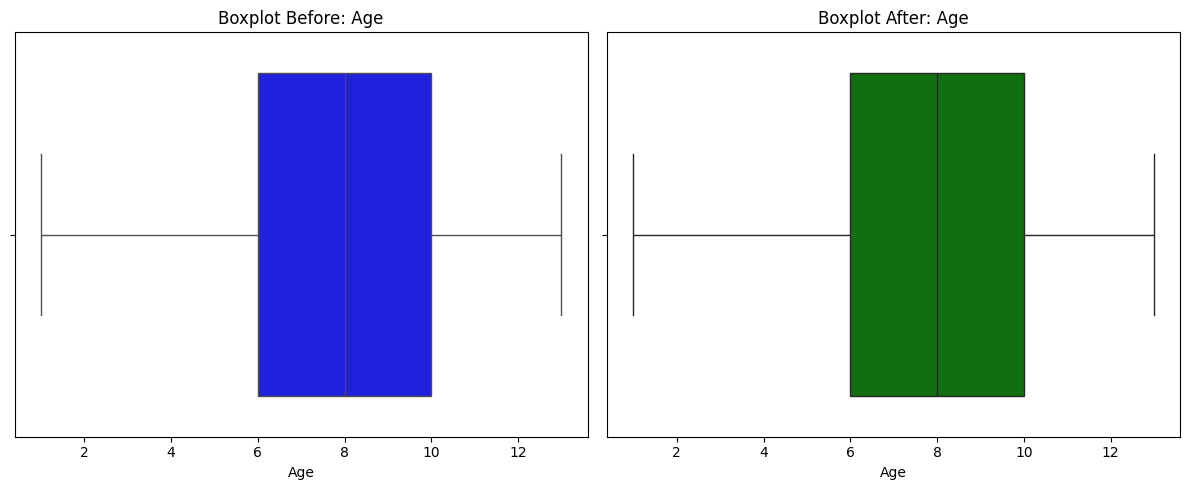

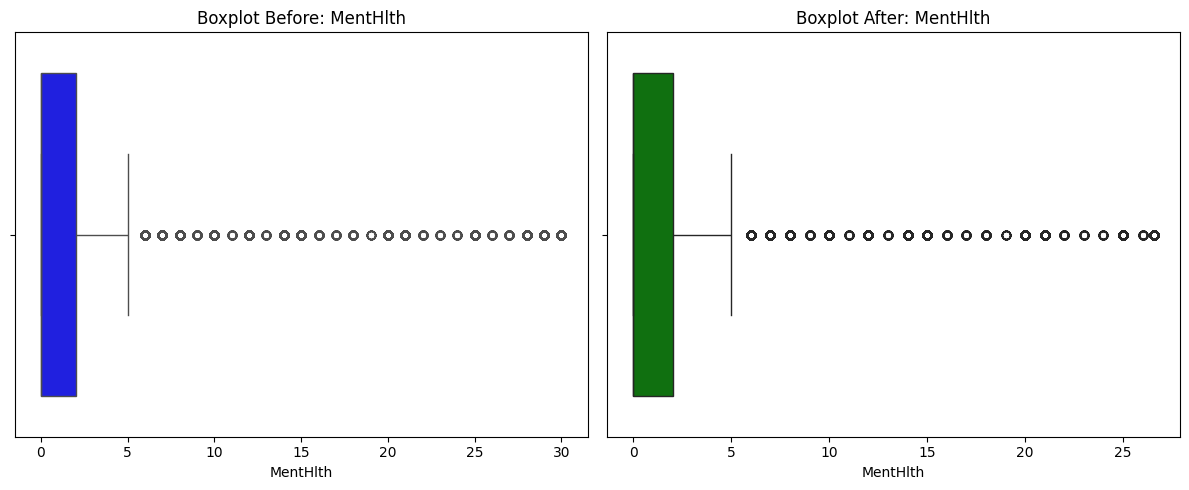

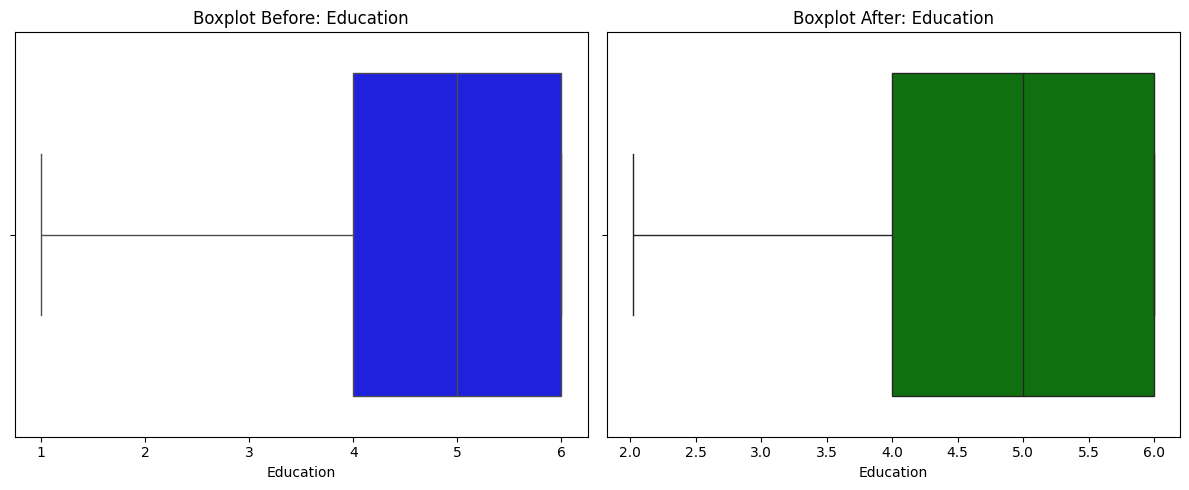

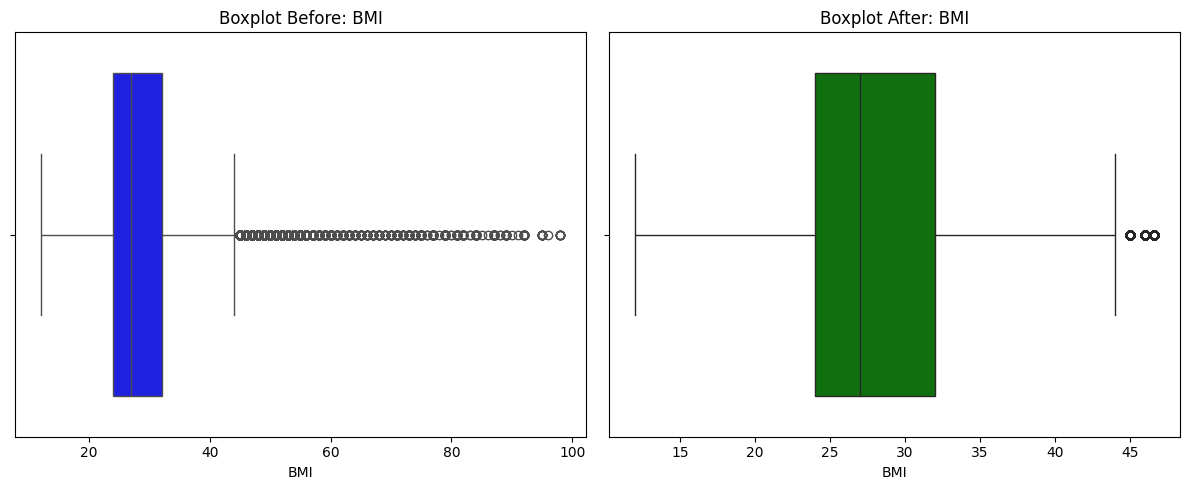

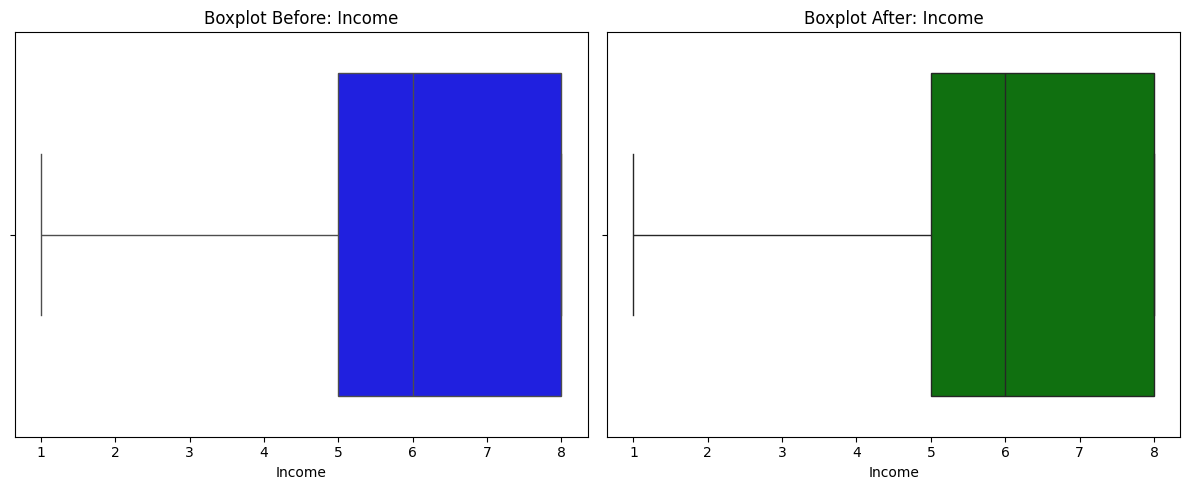

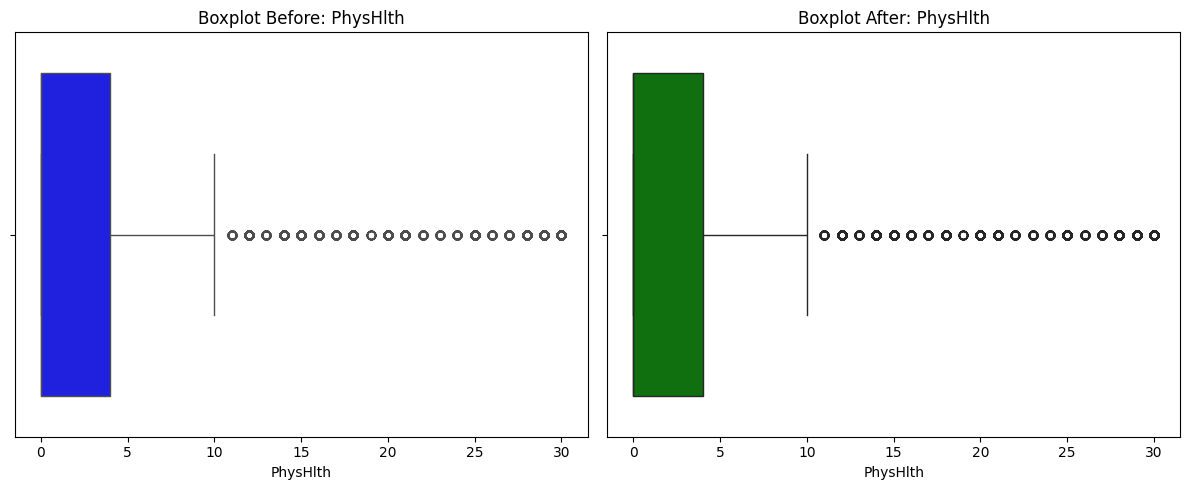

In [8]:

binary_features = [col for col in numerical_columns if df[col].nunique() == 2]
non_binary_features = list(set(numerical_columns) - set(binary_features))

print(f"Binary Features: {binary_features}")
print(f"Non-Binary Numerical Features: {non_binary_features}")
z_scores = df[non_binary_features].apply(zscore)
z_scores = z_scores.fillna(0)
print(" Z-score Summary BEFORE Outlier Handling:")
print(z_scores.describe().loc[['mean', 'std']])
high_outliers = (z_scores.abs() > 4).any(axis=1)
df_cleaned = df[~high_outliers]
print(f"\Dataset shape after removing extreme outliers: {df_cleaned.shape}")
z_scores_cleaned = df_cleaned[non_binary_features].apply(zscore).fillna(0)

print("\nZ-score Summary AFTER Removing Extreme Outliers:")
print(z_scores_cleaned.describe().loc[['mean', 'std']])

df_imputed = df_cleaned.copy()

for col in non_binary_features:
    upper_bound = df_cleaned[col].mean() + 3 * df_cleaned[col].std()
    lower_bound = df_cleaned[col].mean() - 3 * df_cleaned[col].std()
    df_imputed.loc[df_imputed[col] > upper_bound, col] = upper_bound
    df_imputed.loc[df_imputed[col] < lower_bound, col] = lower_bound
print(f" Dataset shape after outlier imputation: {df_imputed.shape}")
z_scores_imputed = df_imputed[non_binary_features].apply(zscore).fillna(0)
print(" Z-score Summary AFTER Imputation:")
print(z_scores_imputed.describe().loc[['mean', 'std']])

for column in non_binary_features:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='blue')
    plt.title(f'Boxplot Before: {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_imputed[column], color='green')
    plt.title(f'Boxplot After: {column}')

    plt.tight_layout()
    plt.show()


When data is analyzed visually or statistically, the goal is to understand how values are spread out and how they relate to one another. Continuous variables—which can take a wide range of numbers—exhibit characteristics such as a central tendency, variation, and potential outliers. For instance, a box plot can clearly display the median, quartiles, and any outliers present in a continuous variable. In contrast, binary features only take on two values (for example, 0 and 1), so a box plot of a binary variable would simply show two distinct points, offering little meaningful insight into the variable’s distribution.

Skewness BEFORE Transformation:
GenHlth      0.353853
Age         -0.387399
MentHlth     2.408245
Education   -0.655731
BMI          0.806446
Income      -0.784782
PhysHlth     2.056384
dtype: float64
Skewness AFTER Transformation:
GenHlth      0.353853
Age         -0.387399
MentHlth     1.499757
Education    0.101744
BMI          0.339442
Income       0.115699
PhysHlth     1.255970
dtype: float64


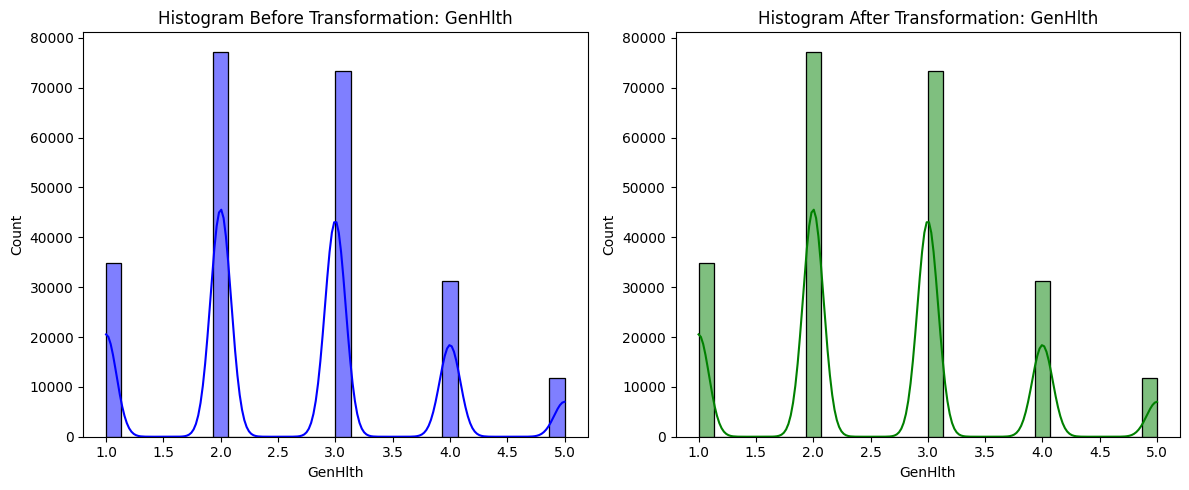

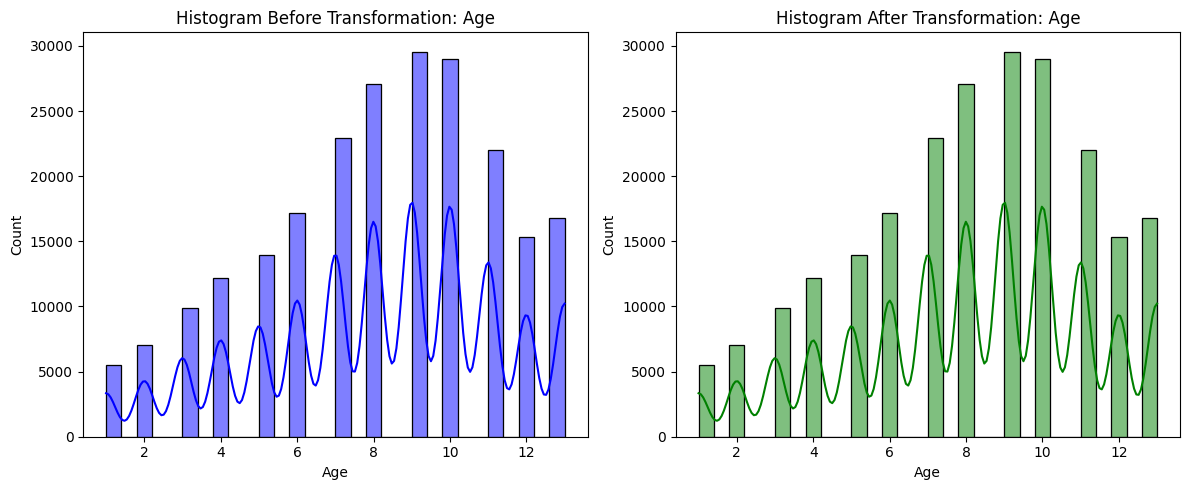

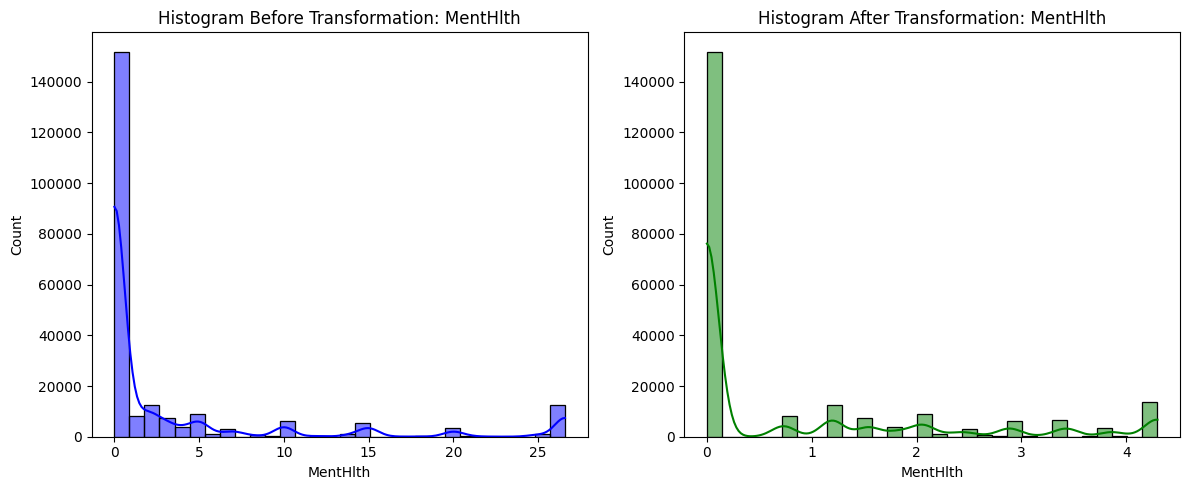

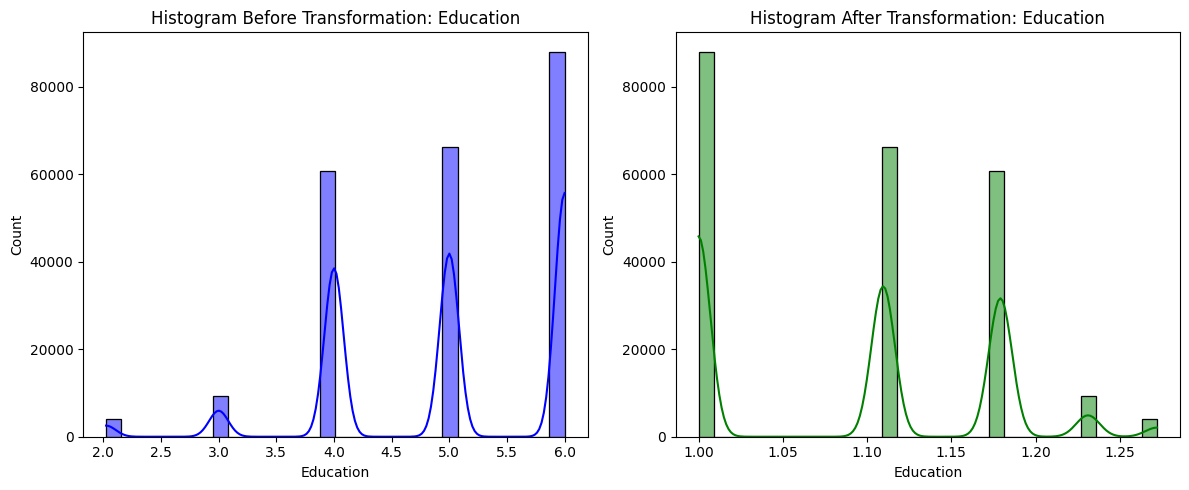

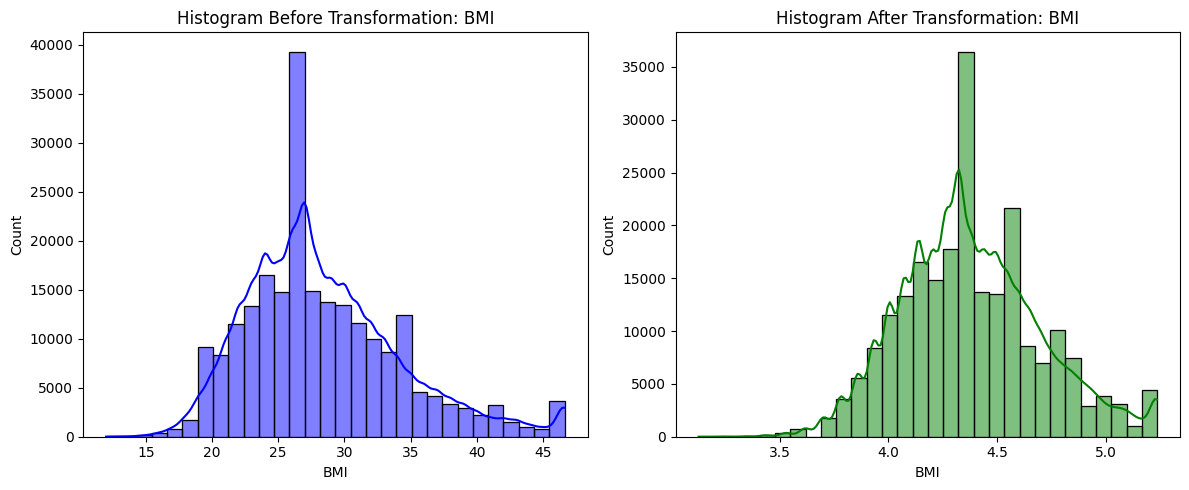

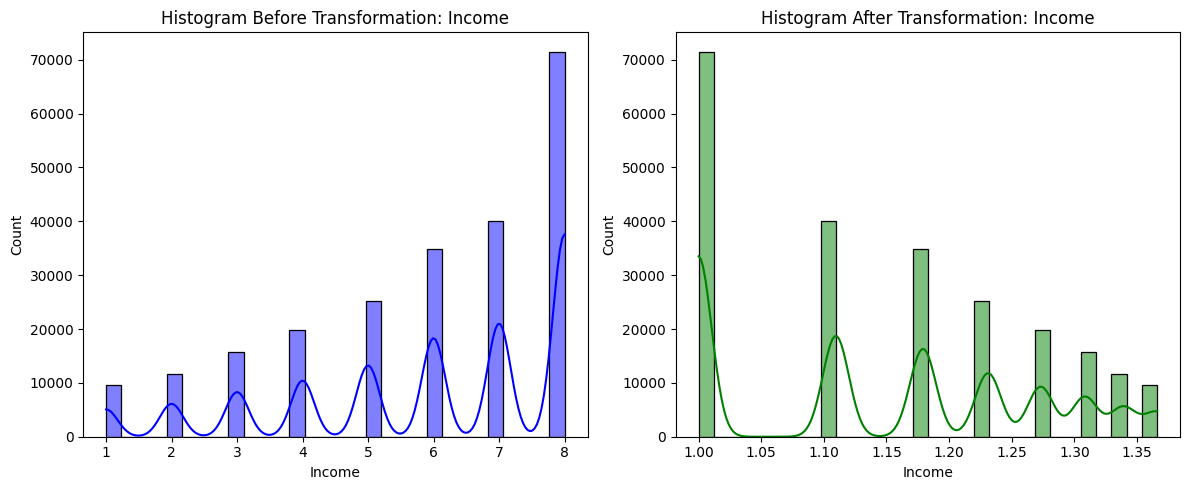

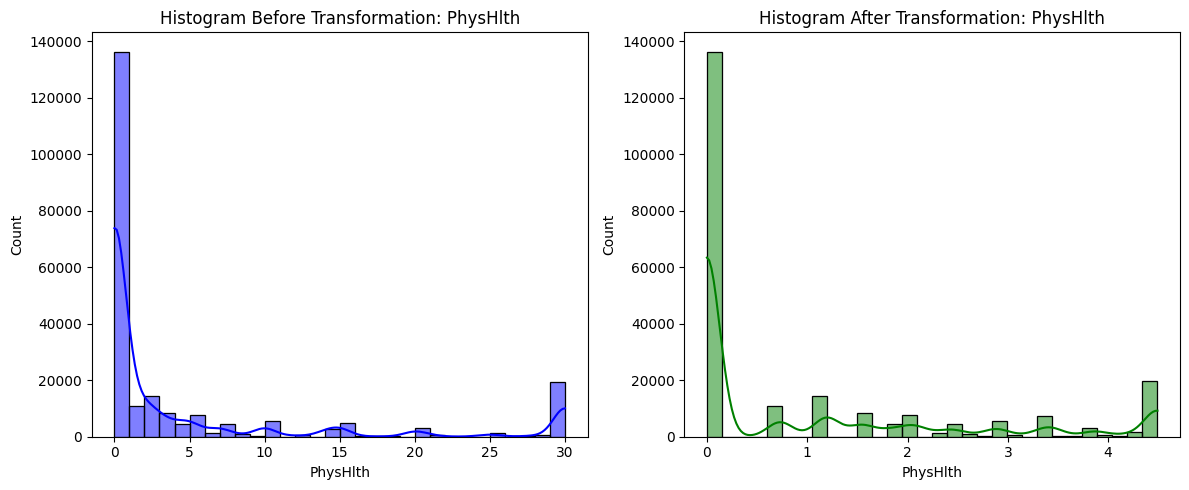

In [9]:
from scipy.special import boxcox1p
skewness_values = df_imputed[non_binary_features].skew()
print("Skewness BEFORE Transformation:")
print(skewness_values)
df_transformed = df_imputed.copy()

for col in non_binary_features:
    if skewness_values[col] > 0.5:  # Positive Skew
        df_transformed[col] = boxcox1p(df_imputed[col], 0.15)  # Log-like transformation
    elif skewness_values[col] < -0.5:  # Negative Skew
        df_transformed[col] = np.power(df_imputed[col].max() - df_imputed[col] + 1, 0.15)

skewness_after = df_transformed[non_binary_features].skew()

print("Skewness AFTER Transformation:")
print(skewness_after)

for column in non_binary_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_imputed[column], bins=30, kde=True, color='blue')
    plt.title(f'Histogram Before Transformation: {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(df_transformed[column], bins=30, kde=True, color='green')
    plt.title(f'Histogram After Transformation: {column}')

    plt.tight_layout()
    plt.show()

Skewness is used to measure the asymmetry of a distribution. With continuous data, skewness reveals whether most values are clustered to one side of the average. However, because binary data only consists of two values, it does not possess a meaningful “shape” to evaluate its skewness merely reflects the proportion of zeros to ones, which is not as informative.

In [10]:
print("Final Cleaned Data (Head):")
print(df_transformed.head())

print("Final Dataset Info:")
print(df_transformed.info())

print(" Final Numerical Summary:")
print(df_transformed.describe())


Final Cleaned Data (Head):
   Diabetes_012  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  4.969939     1.0     0.0   
1           0.0     0.0       0.0        0.0  4.201461     1.0     0.0   
2           0.0     1.0       1.0        1.0  4.380946     0.0     0.0   
3           0.0     1.0       0.0        1.0  4.322948     0.0     0.0   
4           0.0     1.0       1.0        1.0  4.137711     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0  3.701973 

In [11]:
df_transformed.shape
binary_features = [col for col in df_transformed.columns if df_transformed[col].nunique() == 2]
correlation = df_transformed.drop(columns=binary_features).corr()


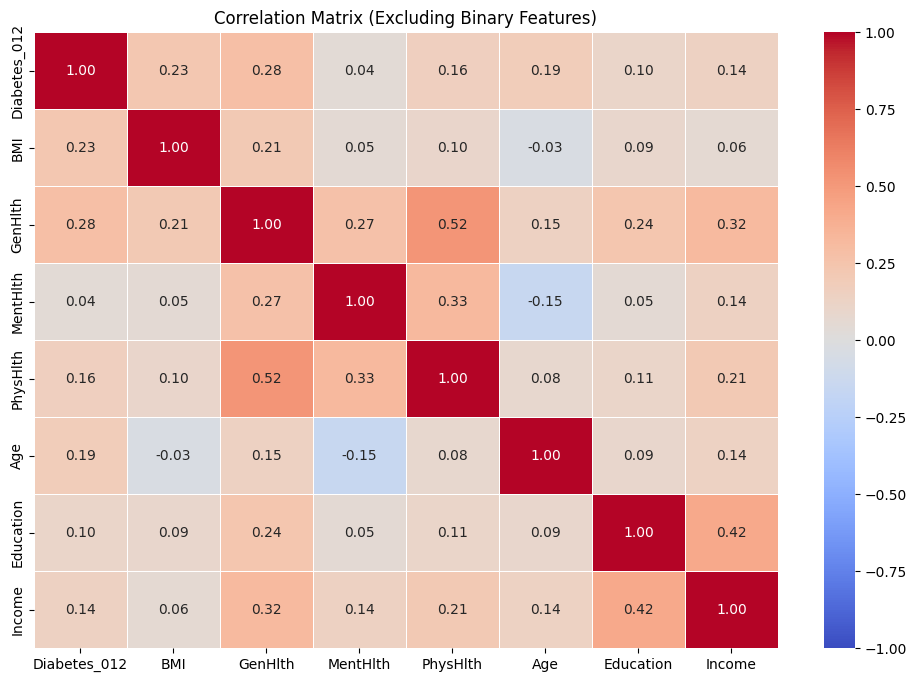

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix (Excluding Binary Features)')
plt.show()

When constructing a **correlation matrix**, the interest lies in examining how continuous variables vary together. Correlation calculations, such as Pearson’s coefficient, assume that the data is continuous and normally distributed. Including binary features in the correlation matrix can distort these relationships because binary data behaves in a fundamentally different manner compared to continuous data. By focusing on non-binary features for box plots, skewness calculations, and correlation analysis, analysts can obtain clearer, more actionable insights into the true distribution and interrelationships of the data.

In here General health and Physical health , Education and Income gives the higher corelation



Unique Value Counts for Diabetes_012:
 Diabetes_012
0.0    189095
2.0     34730
1.0      4596
Name: count, dtype: int64


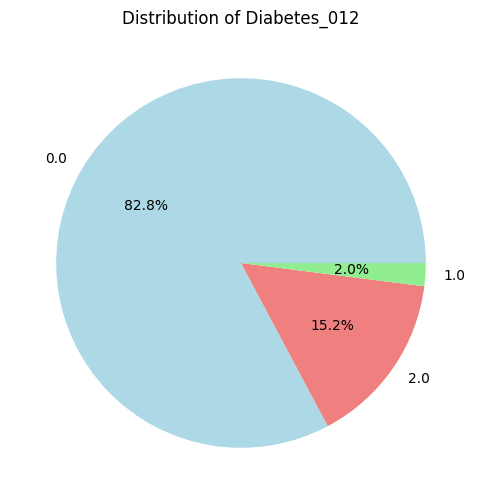

In [13]:
diabetes_counts = df_transformed['Diabetes_012'].value_counts()
print("\nUnique Value Counts for Diabetes_012:\n", diabetes_counts)
plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Diabetes_012')
plt.show()

The samples for the class 1 is very less compared to other classes so It would be so difficult for model. Class 1  represends **Prediabetes**

In [14]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
df = df_transformed.copy()
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


**Split into train, validateion, and test**

In [15]:

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")
binary_features = [col for col in X_train.columns if X_train[col].nunique() == 2]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

numerical_features = [col for col in X_train.columns if col not in binary_features]
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

Training set: (146188, 21), Validation set: (36548, 21), Testing set: (45685, 21)


In [16]:
print("Before dropping NaNs:")
print(f"Training set: {X_train_scaled.shape}, Validation set: {X_val_scaled.shape}, Testing set: {X_test_scaled.shape}")
X_train_scaled = X_train_scaled.dropna()
y_train = y_train.loc[X_train_scaled.index]

X_val_scaled = X_val_scaled.dropna()
y_val = y_val.loc[X_val_scaled.index]

X_test_scaled = X_test_scaled.dropna()
y_test = y_test.loc[X_test_scaled.index]
print("\nAfter dropping NaNs:")
print(f"Training set: {X_train_scaled.shape}, Validation set: {X_val_scaled.shape}, Testing set: {X_test_scaled.shape}")


Before dropping NaNs:
Training set: (146188, 21), Validation set: (36548, 21), Testing set: (45685, 21)

After dropping NaNs:
Training set: (146188, 21), Validation set: (36548, 21), Testing set: (45685, 21)


**Rechecking is there any NaN values**

 Training KNN with hyperparameter tuning...
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
 Training Naive Bayes with hyperparameter tuning...
 Training Logistic Regression with hyperparameter tuning...
Best Parameters for Logistic Regression: {'C': 0.01}
 Training XGBoost with hyperparameter tuning...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 50}
 Training Decision Tree with hyperparameter tuning...
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5}
 Training AdaBoost with hyperparameter tuning...
Best Parameters for AdaBoost: {'n_estimators': 200}
 Training CatBoost with hyperparameter tuning...
Best Parameters for CatBoost: {'iterations': 100, 'learning_rate': 0.1}
Classification Report for KNN:

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.43      0.19      0.27      6946

   

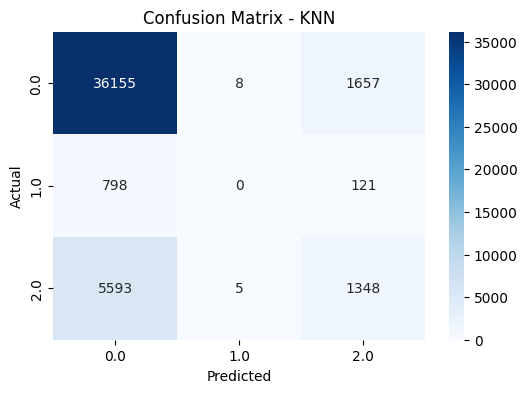

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     37820
         1.0       0.03      0.01      0.01       919
         2.0       0.33      0.58      0.42      6946

    accuracy                           0.74     45685
   macro avg       0.42      0.46      0.42     45685
weighted avg       0.80      0.74      0.76     45685



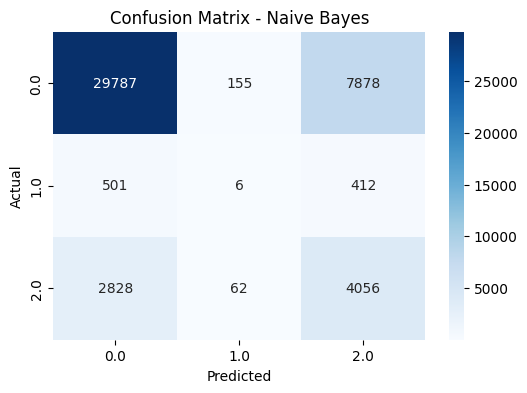

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.55      0.19      0.28      6946

    accuracy                           0.83     45685
   macro avg       0.47      0.39      0.40     45685
weighted avg       0.79      0.83      0.79     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

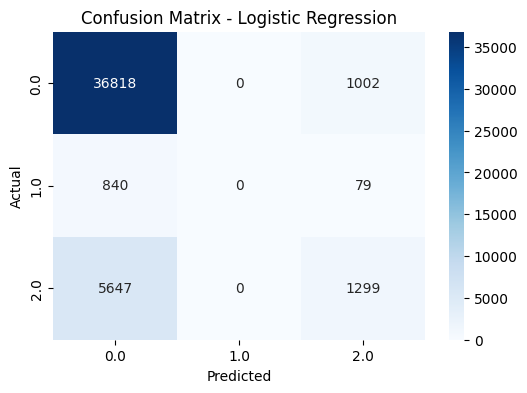

Classification Report for XGBoost:

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.58      0.17      0.26      6946

    accuracy                           0.84     45685
   macro avg       0.48      0.38      0.39     45685
weighted avg       0.79      0.84      0.79     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

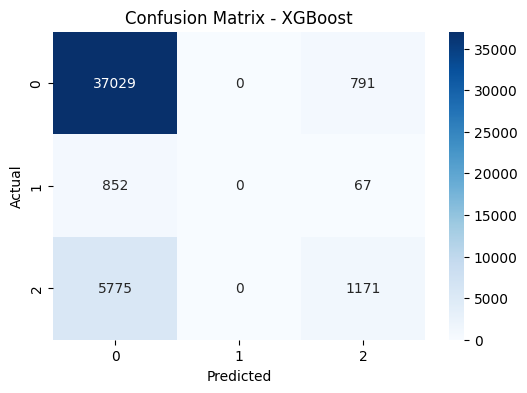

Classification Report for Decision Tree:

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.57      0.13      0.22      6946

    accuracy                           0.83     45685
   macro avg       0.47      0.37      0.38     45685
weighted avg       0.79      0.83      0.79     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

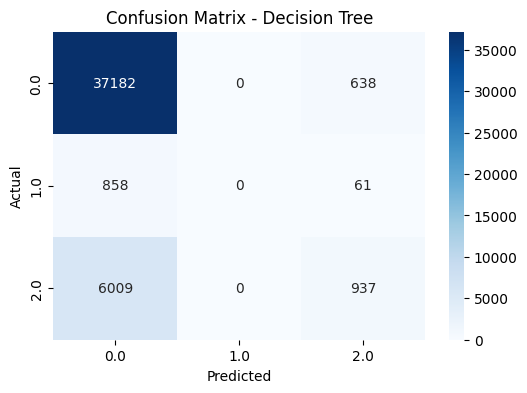

Classification Report for AdaBoost:

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.55      0.20      0.29      6946

    accuracy                           0.84     45685
   macro avg       0.47      0.39      0.40     45685
weighted avg       0.79      0.84      0.80     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

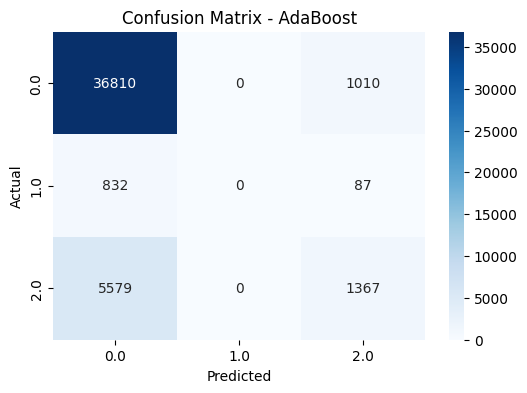

Classification Report for CatBoost:

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.57      0.19      0.29      6946

    accuracy                           0.84     45685
   macro avg       0.47      0.39      0.40     45685
weighted avg       0.79      0.84      0.80     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

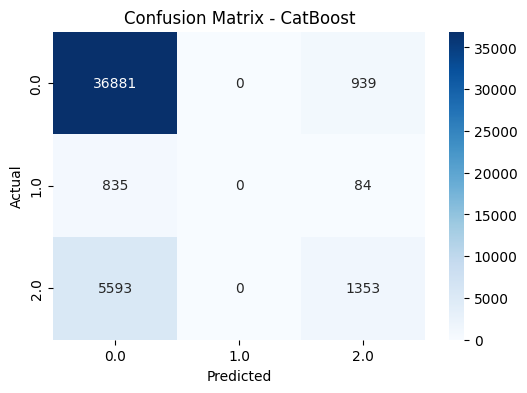

In [17]:
models_params = {
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Logistic Regression": (LogisticRegression(), {"C": [0.01, 0.1, 1, 10]}),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, verbosity=0), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [5, 10, 20], "criterion": ["gini", "entropy"]}),
    "AdaBoost": (AdaBoostClassifier(), {"n_estimators": [50, 100, 200]}),
    "CatBoost": (CatBoostClassifier(verbose=0), {"iterations": [100, 200], "learning_rate": [0.01, 0.1]}),

}
best_models = {}

for name, (model, params) in models_params.items():
    print(f" Training {name} with hyperparameter tuning...")

    if params:
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train_scaled, y_train)

    best_models[name] = best_model

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

for model_name, model in best_models.items():
    evaluate_model(model, X_test_scaled, y_test, model_name)


**7 models are trainned and hyper parameter tunning is also done here.**

When we look to the test result of the model here we identify that the accuracy is vary from 74 to 84. And there are 3 models with the 84 accuracy, they are Ada Boost, CatBoost and XGBoost. Since it is a imbalance dataset we caanot only evaluvate just by accuracy. We need to take consideration of macro- average also. So by comparing these values in here we identify that CatBoost Give the better Result.

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns),y_train)
X_val_smote, y_val_smote = X_val_scaled, y_val
X_test_smote, y_test_smote = X_test_scaled, y_test

print("After SMOTE on Training set:")
print("Training set shape:", X_train_smote.shape)
print("Class distribution:\n", pd.Series(y_train_smote).value_counts())

c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After SMOTE on Training set:
Training set shape: (363057, 21)
Class distribution:
 Diabetes_012
0.0    121019
2.0    121019
1.0    121019
Name: count, dtype: int64


Since it is imbalnce class we need to give any sampling techniques. There are many sampling techniques like over-sampling, under-sampling and so on. I used here is a Over Sampling Technique called **SMOTE**. Here synthetic samples are created in minority classes.

In [19]:
models_params = {
    "Naive Bayes": (GaussianNB(), {}),
    "Logistic Regression": (LogisticRegression(), {"C": [0.01, 0.1, 1, 10]}),
    "XGBoost": (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, verbosity=0), {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}),
    "Decision Tree": (DecisionTreeClassifier(), {"max_depth": [5, 10, 20], "criterion": ["gini", "entropy"]}),
    "AdaBoost": (AdaBoostClassifier(), {"n_estimators": [50, 100, 200]}),
    "CatBoost": (CatBoostClassifier(verbose=0), {"iterations": [100, 200], "learning_rate": [0.01, 0.1]}),

}


 Training Naive Bayes with hyperparameter tuning...
 Training Logistic Regression with hyperparameter tuning...
 Best Parameters for Logistic Regression: {'C': 1}
 Training XGBoost with hyperparameter tuning...
 Best Parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}
 Training Decision Tree with hyperparameter tuning...
 Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20}
 Training AdaBoost with hyperparameter tuning...
 Best Parameters for AdaBoost: {'n_estimators': 200}
 Training CatBoost with hyperparameter tuning...
 Best Parameters for CatBoost: {'iterations': 200, 'learning_rate': 0.1}

--- Evaluating Naive Bayes on Test Set ---

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

         0.0       0.95      0.48      0.64     37820
         1.0       0.02      0.36      0.05       919
         2.0       0.32      0.60      0.42      6946

    accuracy                           0.49     45685
   ma

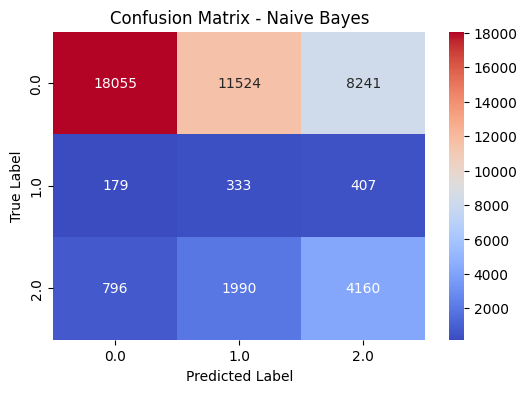


--- Evaluating Logistic Regression on Test Set ---

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76     37820
         1.0       0.03      0.31      0.06       919
         2.0       0.36      0.57      0.44      6946

    accuracy                           0.62     45685
   macro avg       0.44      0.51      0.42     45685
weighted avg       0.83      0.62      0.70     45685



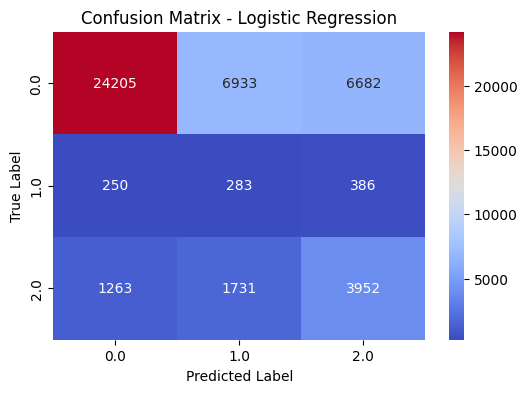


--- Evaluating XGBoost on Test Set ---

Classification Report for XGBoost:

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.43      0.44      0.43      6946

    accuracy                           0.81     45685
   macro avg       0.44      0.45      0.44     45685
weighted avg       0.80      0.81      0.80     45685



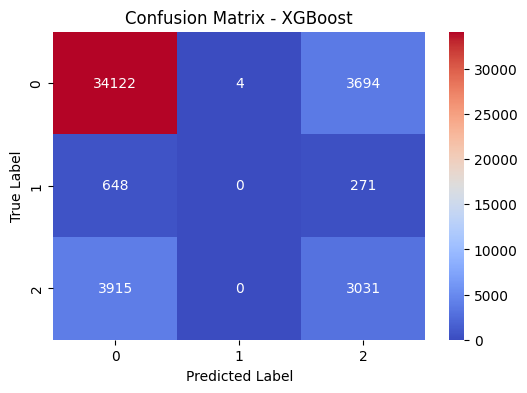


--- Evaluating Decision Tree on Test Set ---

Classification Report for Decision Tree:

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86     37820
         1.0       0.03      0.04      0.03       919
         2.0       0.34      0.41      0.37      6946

    accuracy                           0.75     45685
   macro avg       0.42      0.43      0.42     45685
weighted avg       0.78      0.75      0.77     45685



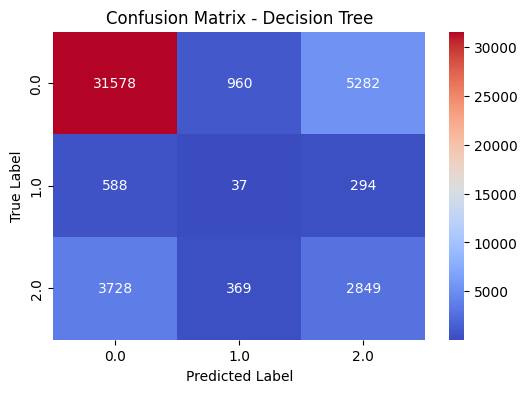


--- Evaluating AdaBoost on Test Set ---

Classification Report for AdaBoost:

              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83     37820
         1.0       0.04      0.03      0.04       919
         2.0       0.34      0.67      0.45      6946

    accuracy                           0.73     45685
   macro avg       0.43      0.49      0.44     45685
weighted avg       0.81      0.73      0.76     45685



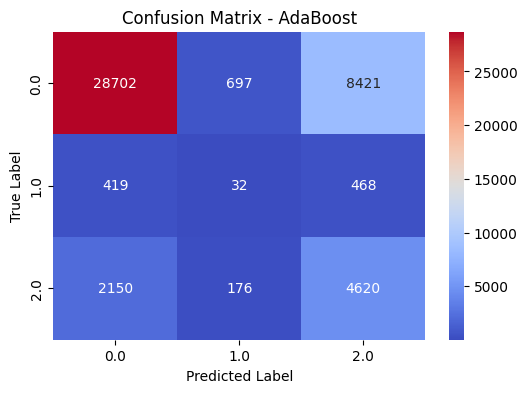


--- Evaluating CatBoost on Test Set ---

Classification Report for CatBoost:

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.48      0.33      0.39      6946

    accuracy                           0.83     45685
   macro avg       0.45      0.42      0.43     45685
weighted avg       0.79      0.83      0.81     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

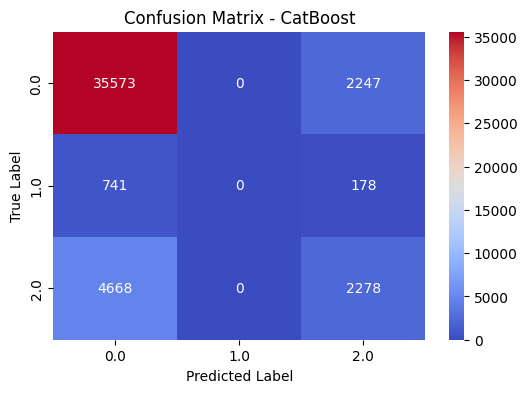

c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
best_models = {}

for name, (model, params) in models_params.items():
    print(f" Training {name} with hyperparameter tuning...")
    if params:
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train_smote, y_train_smote)
        best_estimator = grid_search.best_estimator_
        print(f" Best Parameters for {name}: {grid_search.best_params_}")
    else:
        model.fit(X_train_smote, y_train_smote)
        best_estimator = model
    best_models[name] = best_estimator

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

results = {}

for model_name, model in best_models.items():
    print(f"\n--- Evaluating {model_name} on Test Set ---")
    y_pred = model.predict(X_test_scaled)

    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    tick_labels = model.classes_ if hasattr(model, "classes_") else np.unique(y_test)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=tick_labels, yticklabels=tick_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = [acc, prec, rec, f1]


We can Identify that after appliying SMOTE the macro average of the result increases.

Since the dataset is highly imbalanced, accuracy alone is not a reliable metric for evaluation. After applying SMOTE, we observe a slight decrease of approximately 1% in the accuracy of CatBoost compared to the model without SMOTE. However, there is a marginal improvement in the **macro-average** metrics, which is crucial for handling class imbalance. Considering these results, we conclude that CatBoost with SMOTE provides the best overall performance. Additionally, the optimal hyperparameters identified for the model are **200 iterations and a learning rate of 0.01.**

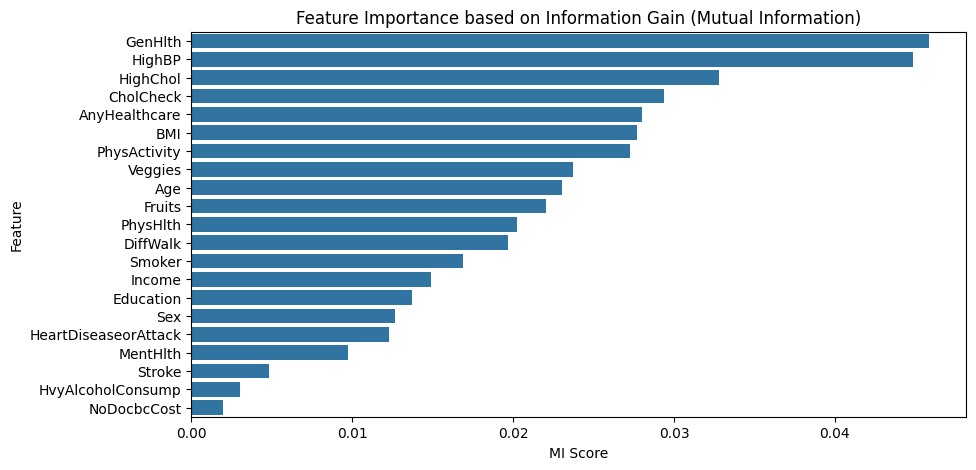

Classification Report for CatBoost (Feature Selected):

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     37820
         1.0       0.00      0.00      0.00       919
         2.0       0.56      0.18      0.27      6946

    accuracy                           0.84     45685
   macro avg       0.47      0.39      0.39     45685
weighted avg       0.79      0.84      0.79     45685



c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Alen Jose\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

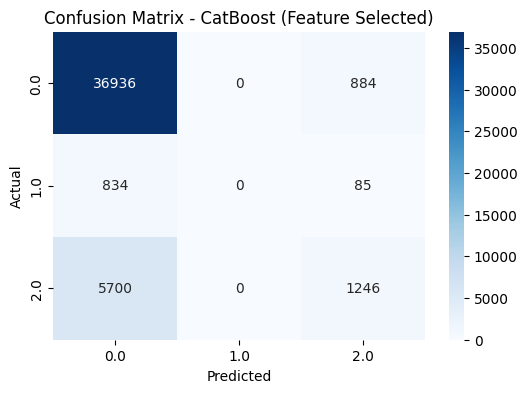

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train_scaled, y_train)

mi_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='MI Score', y='Feature', data=mi_df)
plt.title("Feature Importance based on Information Gain (Mutual Information)")
plt.show()

top_k = 15  
selected_features = mi_df.head(top_k)['Feature'].tolist()
X_train_selected = X_train_scaled[selected_features]
X_val_selected = X_val_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

best_catboost = CatBoostClassifier(verbose=0, iterations=200, learning_rate=0.1)
best_catboost.fit(X_train_selected, y_train)

evaluate_model(best_catboost, X_test_selected, y_test, "CatBoost (Feature Selected)")


**Feature selection** has been performed using **Information Gain (IG)** as the criterion, which measures how much predictive information a feature provides about the target variable. IG is derived from Mutual Information (MI), which quantifies the reduction in uncertainty about the target when a given feature is known. In simple terms, IG helps identify the most relevant features for prediction, where features with higher IG values contribute more meaningful information to the model, establishing a stronger relationship with the target variable.

In this analysis, the top **15 features** have been selected based on IG. The results indicate that the model achieves **84% accuracy**, with a slight decrease in the macro-average score. However, due to the reduced number of features, the model becomes **lighter and computationally more efficient** while maintaining strong performance. This balance between accuracy and efficiency makes the selected model the best-performing one.

100%|===================| 45623/45685 [09:00<00:00]        

SHAP Values Shape: (45685, 15)


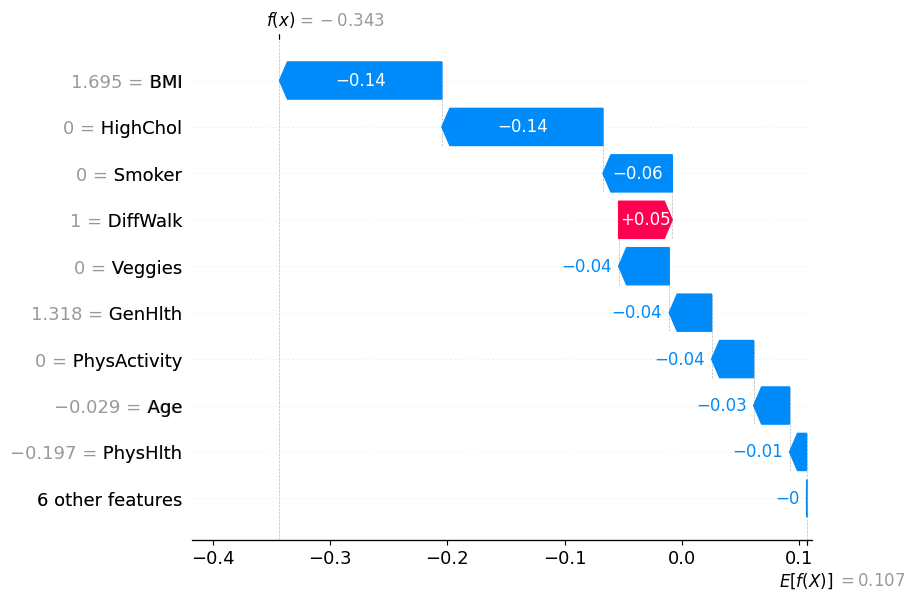

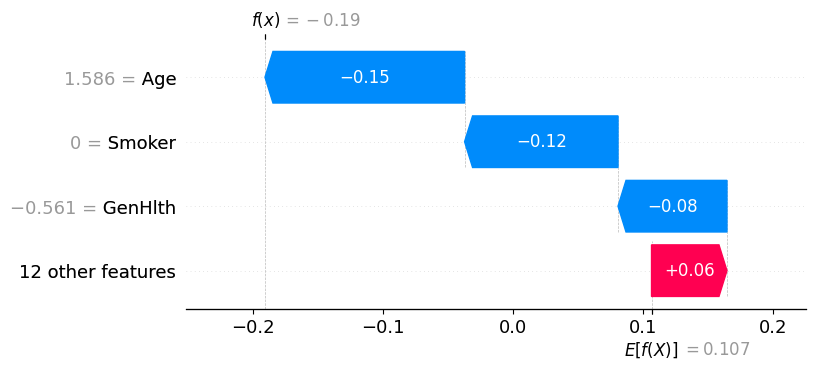

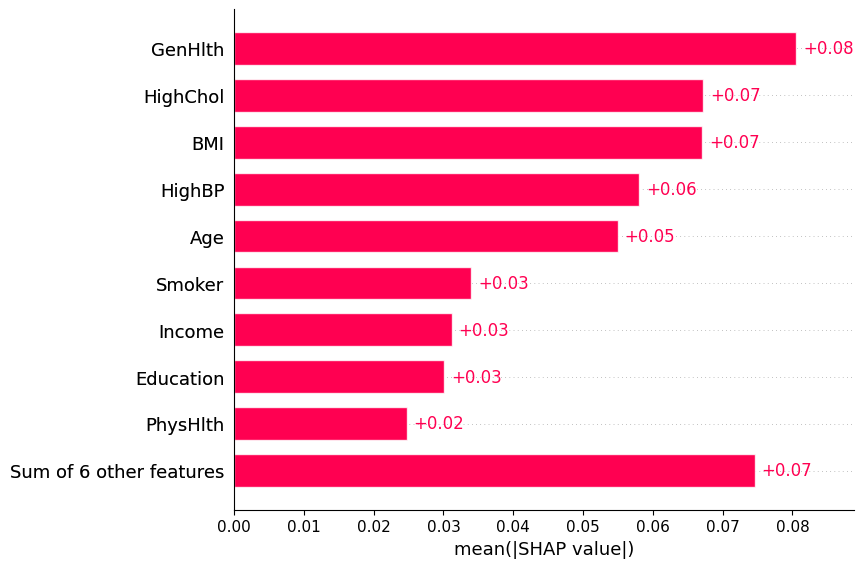

In [ ]:
import shap

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

explainer = shap.Explainer(best_catboost, X_train_selected_df)
shap_values = explainer(X_test_selected_df)
print("SHAP Values Shape:", np.shape(shap_values.values))

shap.plots.waterfall(shap_values[0], max_display=10)
shap.plots.waterfall(shap_values[1], max_display=4)
shap.plots.bar(shap_values)


The **SHAP** visualizations provide insights into the impact of individual features on the model's predictions. The SHAP waterfall plot illustrates how features contribute to a specific instance's prediction, showing that **BMI (-0.14) and HighChol (-0.14)** had the most significant negative effects, lowering the model's output. Other important negative contributors included **Smoker (-0.06), Veggies (-0.04), GenHlth (-0.04), and PhysActivity (-0.04), while DiffWalk (+0.05)** was the only feature slightly increasing the prediction. The overall trend showed that the majority of features pushed the prediction downward, resulting in a final output lower than the base value.

The SHAP summary bar chart highlights the mean absolute SHAP values, representing the overall impact of each feature across multiple instances. The most influential features were **GenHlth (+0.08), HighChol (+0.07), and BMI (+0.07)**, indicating that they played a key role in model predictions. Other important features included **HighBP (+0.06), Age (+0.05), and Smoker (+0.03)**, while smaller contributions came from Income **(+0.03), Education (+0.03), and PhysHlth (+0.02)**. Additionally, the combined impact of six other features contributed +0.07, signifying their cumulative effect.

The SHAP analysis confirms that **GenHlth, HighChol, and BMI** are the most influential factors affecting model predictions. While individual feature contributions vary in different instances, the overall trend highlights their strong impact. The waterfall plot helps understand local predictions, while the summary chart provides a global view of feature importance across the dataset. This combination of interpretability methods ensures a deeper understanding of the model’s decision-making process.